
# 🧪 Wine Quality Clustering with DBSCAN

This notebook demonstrates an end-to-end unsupervised learning pipeline using the **Wine Quality Dataset**. We use **DBSCAN** for clustering and visualize the results using **PCA** and **t-SNE**. 




##  1. Data Loading & Initial Exploration

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Data Overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



## 3. Exploratory Data Analysis (EDA)

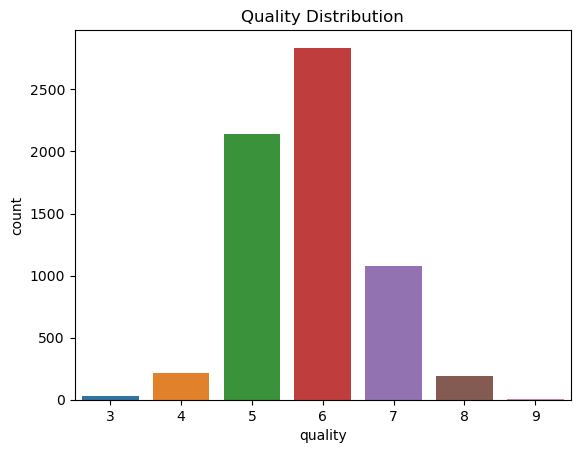

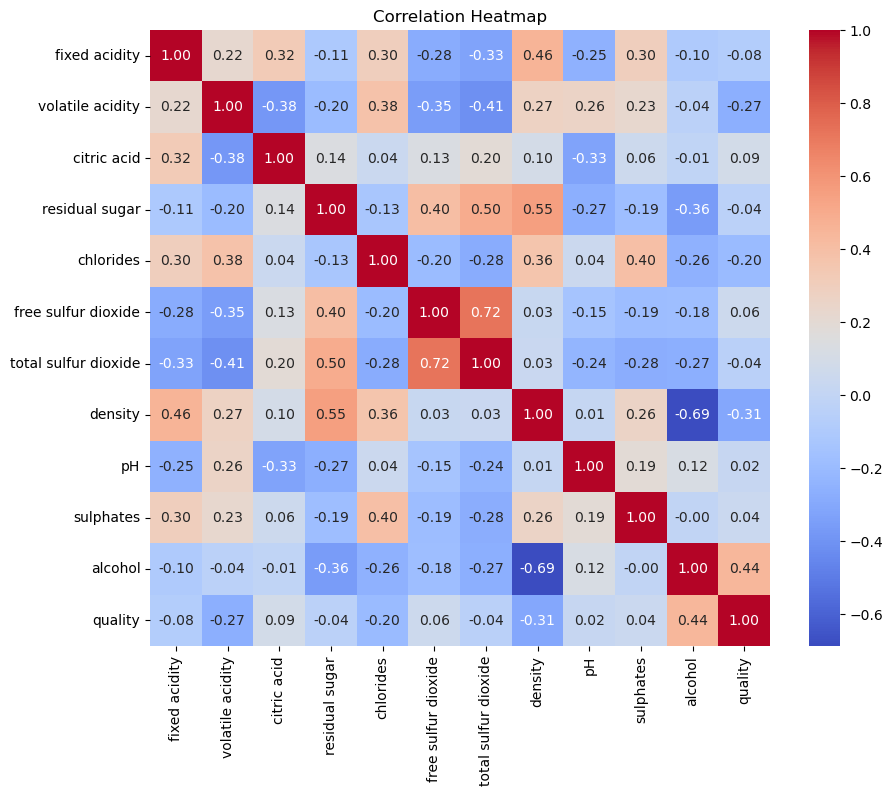

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target
sns.countplot(data=df, x='quality')
plt.title("Quality Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 4. Feature Scaling (StandardScaler)

In [6]:
from sklearn.preprocessing import StandardScaler

features = df.drop("quality", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

## 5. DBSCAN Clustering

In [7]:
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=1.0, min_samples=5)
cluster_labels = db_model.fit_predict(X_scaled)

df_clustered = df.copy()
df_clustered["cluster"] = cluster_labels
df_clustered["cluster"].value_counts()

cluster
-1     3143
 18    2424
 0      471
 12      29
 34      24
       ... 
 6        4
 17       4
 16       4
 60       3
 40       3
Name: count, Length: 66, dtype: int64

## 6. Cluster Distribution

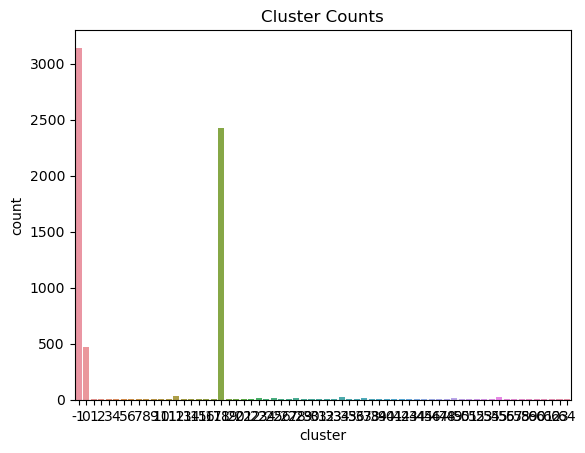

In [8]:
sns.countplot(data=df_clustered, x="cluster")
plt.title("Cluster Counts")
plt.show()

## 7. Dimensionality Reduction with PCA

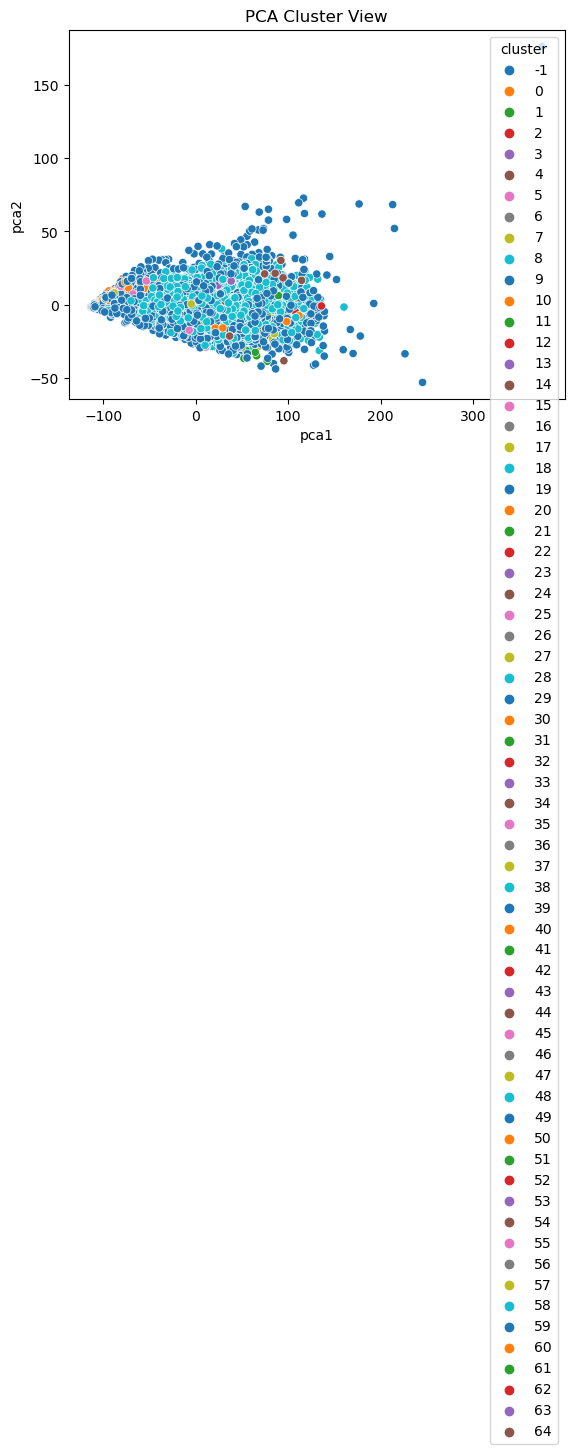

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)
df_clustered["pca1"] = pca_components[:, 0]
df_clustered["pca2"] = pca_components[:, 1]

sns.scatterplot(data=df_clustered, x="pca1", y="pca2", hue="cluster", palette="tab10")
plt.title("PCA Cluster View")
plt.show()

## 8. Dimensionality Reduction with t-SNE

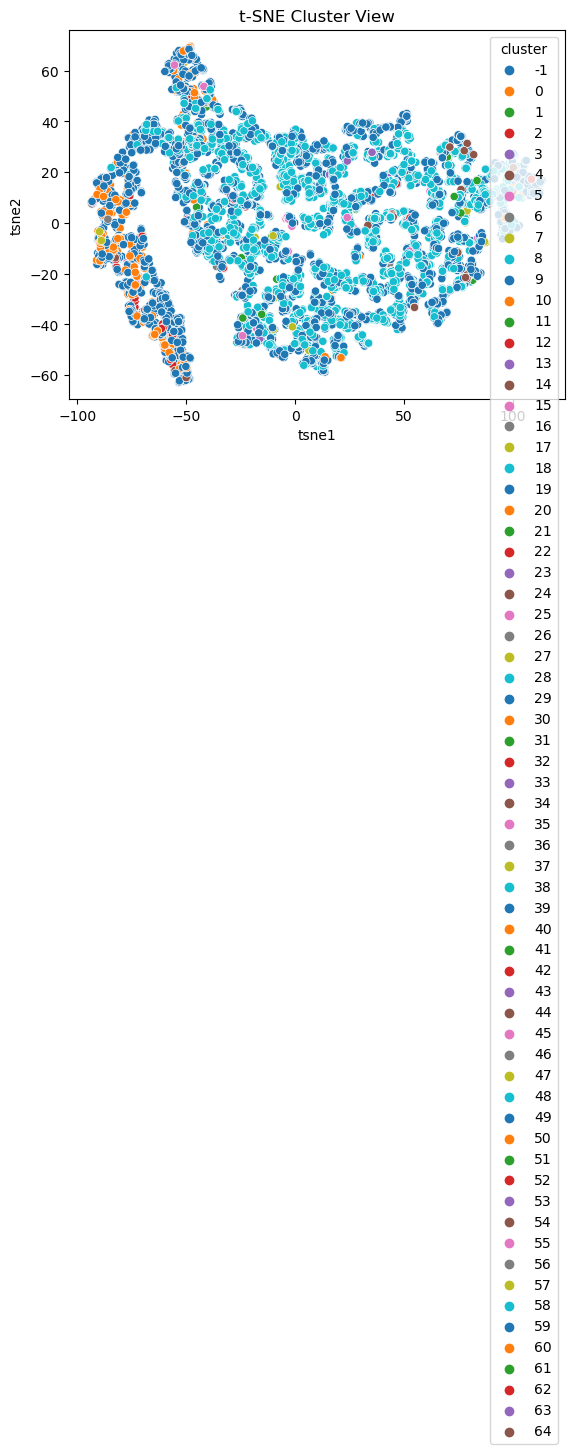

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(features)
df_clustered["tsne1"] = tsne_components[:, 0]
df_clustered["tsne2"] = tsne_components[:, 1]

sns.scatterplot(data=df_clustered, x="tsne1", y="tsne2", hue="cluster", palette="tab10")
plt.title("t-SNE Cluster View")
plt.show()

## 9. Clustering Evaluation

In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

mask = df_clustered['cluster'] != -1
silhouette = silhouette_score(features[mask], df_clustered["cluster"][mask])
db_index = davies_bouldin_score(features[mask], df_clustered["cluster"][mask])

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Silhouette Score: -0.6655
Davies-Bouldin Index: 3.8512


## 10. Save Clustered Output

In [ ]:
df_clustered.to_csv("output/clustered_data.csv", index=False)
with open("output/cluster_metrics.txt", "w") as f:
    f.write(f"Silhouette Score: {silhouette:.4f}\n")
    f.write(f"Davies-Bouldin Index: {db_index:.4f}\n")